## Imports

In [1]:
!pip install xgboost

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import joblib

## Reading the File

**You only need to run the section `Reading the File` once.**

**For the next times, you can skip it and start from the next section `Preprocessing & EDA`.**

In [ ]:
file_path = '/content/drive/MyDrive/AI_in_Industry/complete_dataset.xlsx'
df_org = pd.read_excel(file_path)

In [ ]:
df_org.shape

(8624, 26)

In [ ]:
df_org.head()

,timeDuration,nMovements,movementsDifficulty,robotSpeech,acrobaticMovements,movementsRepetition,musicGenre,movementsTransitionsDuration,humanMovements,balance,...,handsMovement,legsMovement,feetMovement,EvaluationChoreographyStoryTelling,EvaluationChoreographyRhythm,EvaluationChoreographyMovementTechnique,EvaluationChoreographyPublicInvolvement,EvaluationChoreographySpaceUse,EvaluationChoreographyHumanCharacterization,EvaluationChoreographyHumanReproducibility
0,140,20,2,0,2,1,folk,1,2,1,...,1,2,2,2,2,2,1,2,2,3
1,115,21,2,0,3,1,folk,2,3,2,...,2,3,2,3,3,3,3,3,3,2
2,110,20,2,0,3,2,folk,2,3,2,...,2,3,2,1,1,1,1,1,1,1
3,100,19,1,0,1,1,electronic,1,1,1,...,1,2,1,1,2,2,2,2,2,2
4,125,20,3,0,3,2,electronic,2,3,3,...,2,3,2,1,1,1,1,1,1,3


In [ ]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   timeDuration                                 8624 non-null   int64 
 1   nMovements                                   8624 non-null   int64 
 2   movementsDifficulty                          8624 non-null   int64 
 3   robotSpeech                                  8624 non-null   int64 
 4   acrobaticMovements                           8624 non-null   int64 
 5   movementsRepetition                          8624 non-null   int64 
 6   musicGenre                                   8624 non-null   object
 7   movementsTransitionsDuration                 8624 non-null   int64 
 8   humanMovements                               8624 non-null   int64 
 9   balance                                      8624 non-null   int64 
 10  speed       

In [ ]:
df_org.describe().T

,count,mean,std,min,25%,50%,75%,max
timeDuration,8624.0,120.932050,66.224009,70.0,105.0,115.0,127.0,1132.0
nMovements,8624.0,17.420686,3.412798,8.0,15.0,18.0,20.0,24.0
movementsDifficulty,8624.0,1.962778,0.795663,1.0,1.0,2.0,3.0,3.0
robotSpeech,8624.0,0.485506,0.499819,0.0,0.0,0.0,1.0,1.0
acrobaticMovements,8624.0,1.900510,0.832111,1.0,1.0,2.0,3.0,3.0
movementsRepetition,8624.0,2.006841,0.812790,1.0,1.0,2.0,3.0,3.0
movementsTransitionsDuration,8624.0,1.735622,0.718634,1.0,1.0,2.0,2.0,3.0
humanMovements,8624.0,2.046266,0.826651,1.0,1.0,2.0,3.0,3.0
balance,8624.0,2.006841,0.824407,1.0,1.0,2.0,3.0,3.0
speed,8624.0,1.953618,0.807842,1.0,1.0,2.0,3.0,3.0


In the column `musicGenre` some cells were with capital letters. To avoid more columns for similar music categories in one-hot encoded, it is needed to have all the letters in the same format.

In [ ]:
df_org['musicGenre'] = df_org['musicGenre'].str.lower().str.strip()

In [ ]:
df_org = df_org.drop_duplicates()

In [ ]:
ordinal_cols = [
    'movementsDifficulty','acrobaticMovements','movementsRepetition',
    'humanMovements','balance','speed','bodyPartsCombination',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]

for col in ordinal_cols:
    counts = df_org[col].value_counts().sort_index()
    counts_str = ", ".join(f"{level}: {count}" for level, count in counts.items())
    print(f"{col} value counts\n{counts_str}\n")

movementsDifficulty value counts
1: 2896, 2: 3153, 3: 2575

acrobaticMovements value counts
1: 3457, 2: 2568, 3: 2599

movementsRepetition value counts
1: 2819, 2: 2927, 3: 2878

humanMovements value counts
1: 2756, 2: 2713, 3: 3155

balance value counts
1: 2901, 2: 2763, 3: 2960

speed value counts
1: 3023, 2: 2978, 3: 2623

bodyPartsCombination value counts
1: 2776, 2: 2821, 3: 3027

headMovement value counts
1: 3007, 2: 2725, 3: 2892

armsMovement value counts
1: 2657, 2: 2678, 3: 3289

handsMovement value counts
1: 2872, 2: 3222, 3: 2530

legsMovement value counts
1: 2717, 2: 2779, 3: 3128

feetMovement value counts
1: 3079, 2: 3129, 3: 2416



The first music category (classical) is omitted in one-hot encoded by using `drop_first=True`.

In [ ]:
df_org = pd.get_dummies(df_org, columns=['musicGenre'], dtype=int, drop_first=True)

In [ ]:
genre_cols = [c for c in df_org.columns if c.startswith('musicGenre_')]
print("Music-genre dummy columns:", genre_cols)
print(df_org[genre_cols].sum().sort_values(ascending=False))

Music-genre dummy columns: ['musicGenre_electronic', 'musicGenre_folk', 'musicGenre_indie', 'musicGenre_latin', 'musicGenre_pop', 'musicGenre_rap', 'musicGenre_rock']
musicGenre_folk          1590
musicGenre_electronic    1546
musicGenre_rock          1524
musicGenre_pop            914
musicGenre_latin          845
musicGenre_indie          630
musicGenre_rap            629
dtype: int64


In [ ]:
clean_path = '/content/drive/MyDrive/AI_in_Industry/cleaned_choreographies.csv'
df_org.to_csv(clean_path, index=False)
print("Cleaned data saved to:", clean_path)

Cleaned data saved to: /content/drive/MyDrive/AI_in_Industry/cleaned_choreographies.csv


## Preprocessing & EDA

In [4]:
clean_path = '/content/drive/MyDrive/AI_in_Industry/cleaned_choreographies.csv'
df = pd.read_csv(clean_path)
print("\nShape after preprocessing:", df.shape)


Shape after preprocessing: (8563, 32)


In [5]:
genre_cols = [c for c in df.columns if c.startswith('musicGenre_')]
target_cols = [
    'EvaluationChoreographyStoryTelling',
    'EvaluationChoreographyRhythm',
    'EvaluationChoreographyMovementTechnique',
    'EvaluationChoreographyPublicInvolvement',
    'EvaluationChoreographySpaceUse',
    'EvaluationChoreographyHumanCharacterization',
    'EvaluationChoreographyHumanReproducibility'
]

numeric_cols = [c for c in df.columns
                if c not in genre_cols + target_cols]

### Global EDA

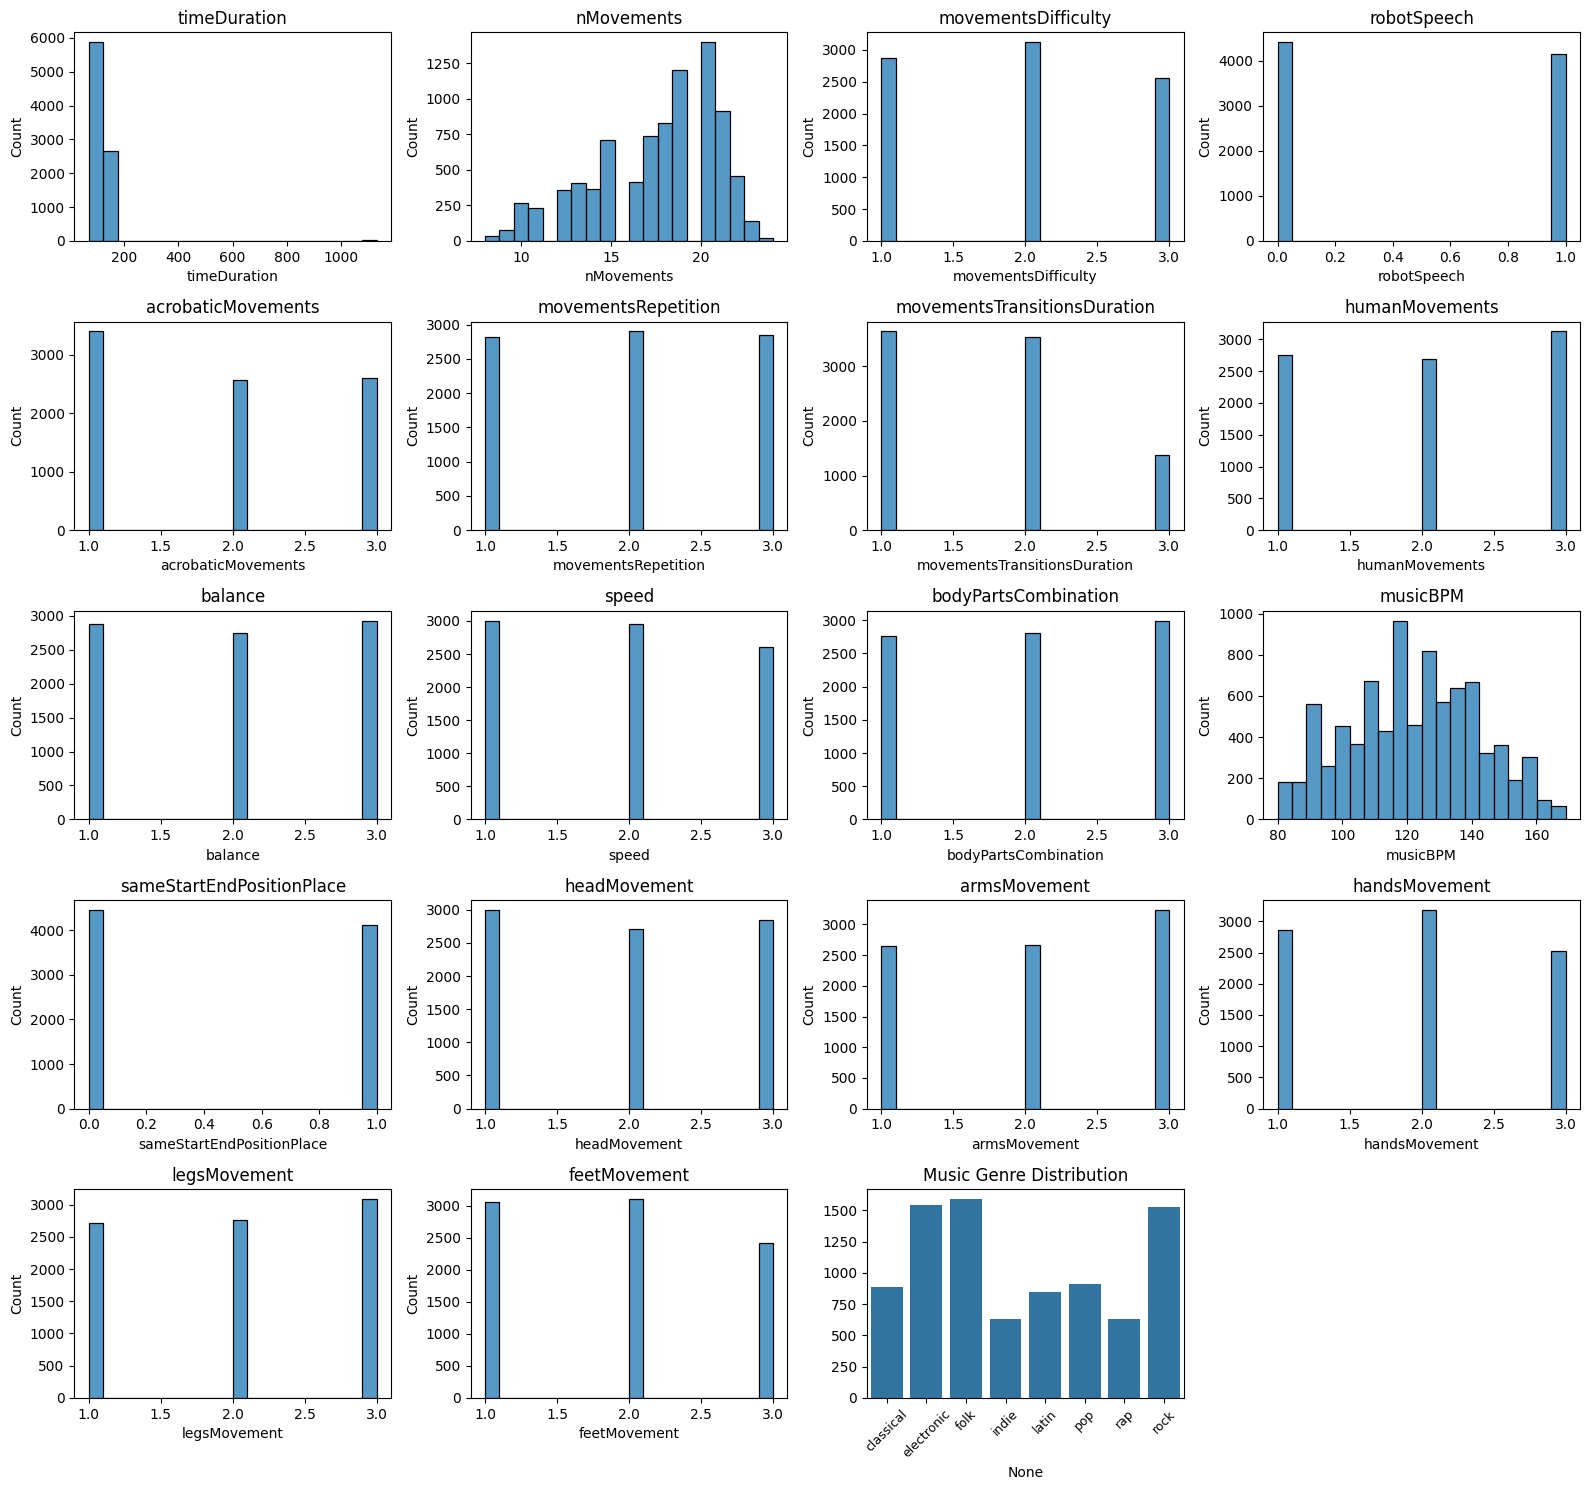

In [ ]:
# Univariate HISTOGRAMS + Genre Bar
baseline_count = (df[genre_cols].sum(axis=1) == 0).sum()
genre_counts = pd.Series(
    [baseline_count] + df[genre_cols].sum().tolist(),
    index=['classical'] + genre_cols
)

total_plots = len(numeric_cols) + 1  # +1 for the genre bar
ncols = 4
nrows = math.ceil(total_plots / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.histplot(df[col], bins=20, ax=ax, kde=False)
    ax.set_title(col)

ax = axes[len(numeric_cols)]
sns.barplot(
    x=genre_counts.index.str.replace('musicGenre_',''),
    y=genre_counts.values,
    ax=ax
)
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.set_title("Music Genre Distribution")

for ax in axes[total_plots:]:
    fig.delaxes(ax)

fig.tight_layout();

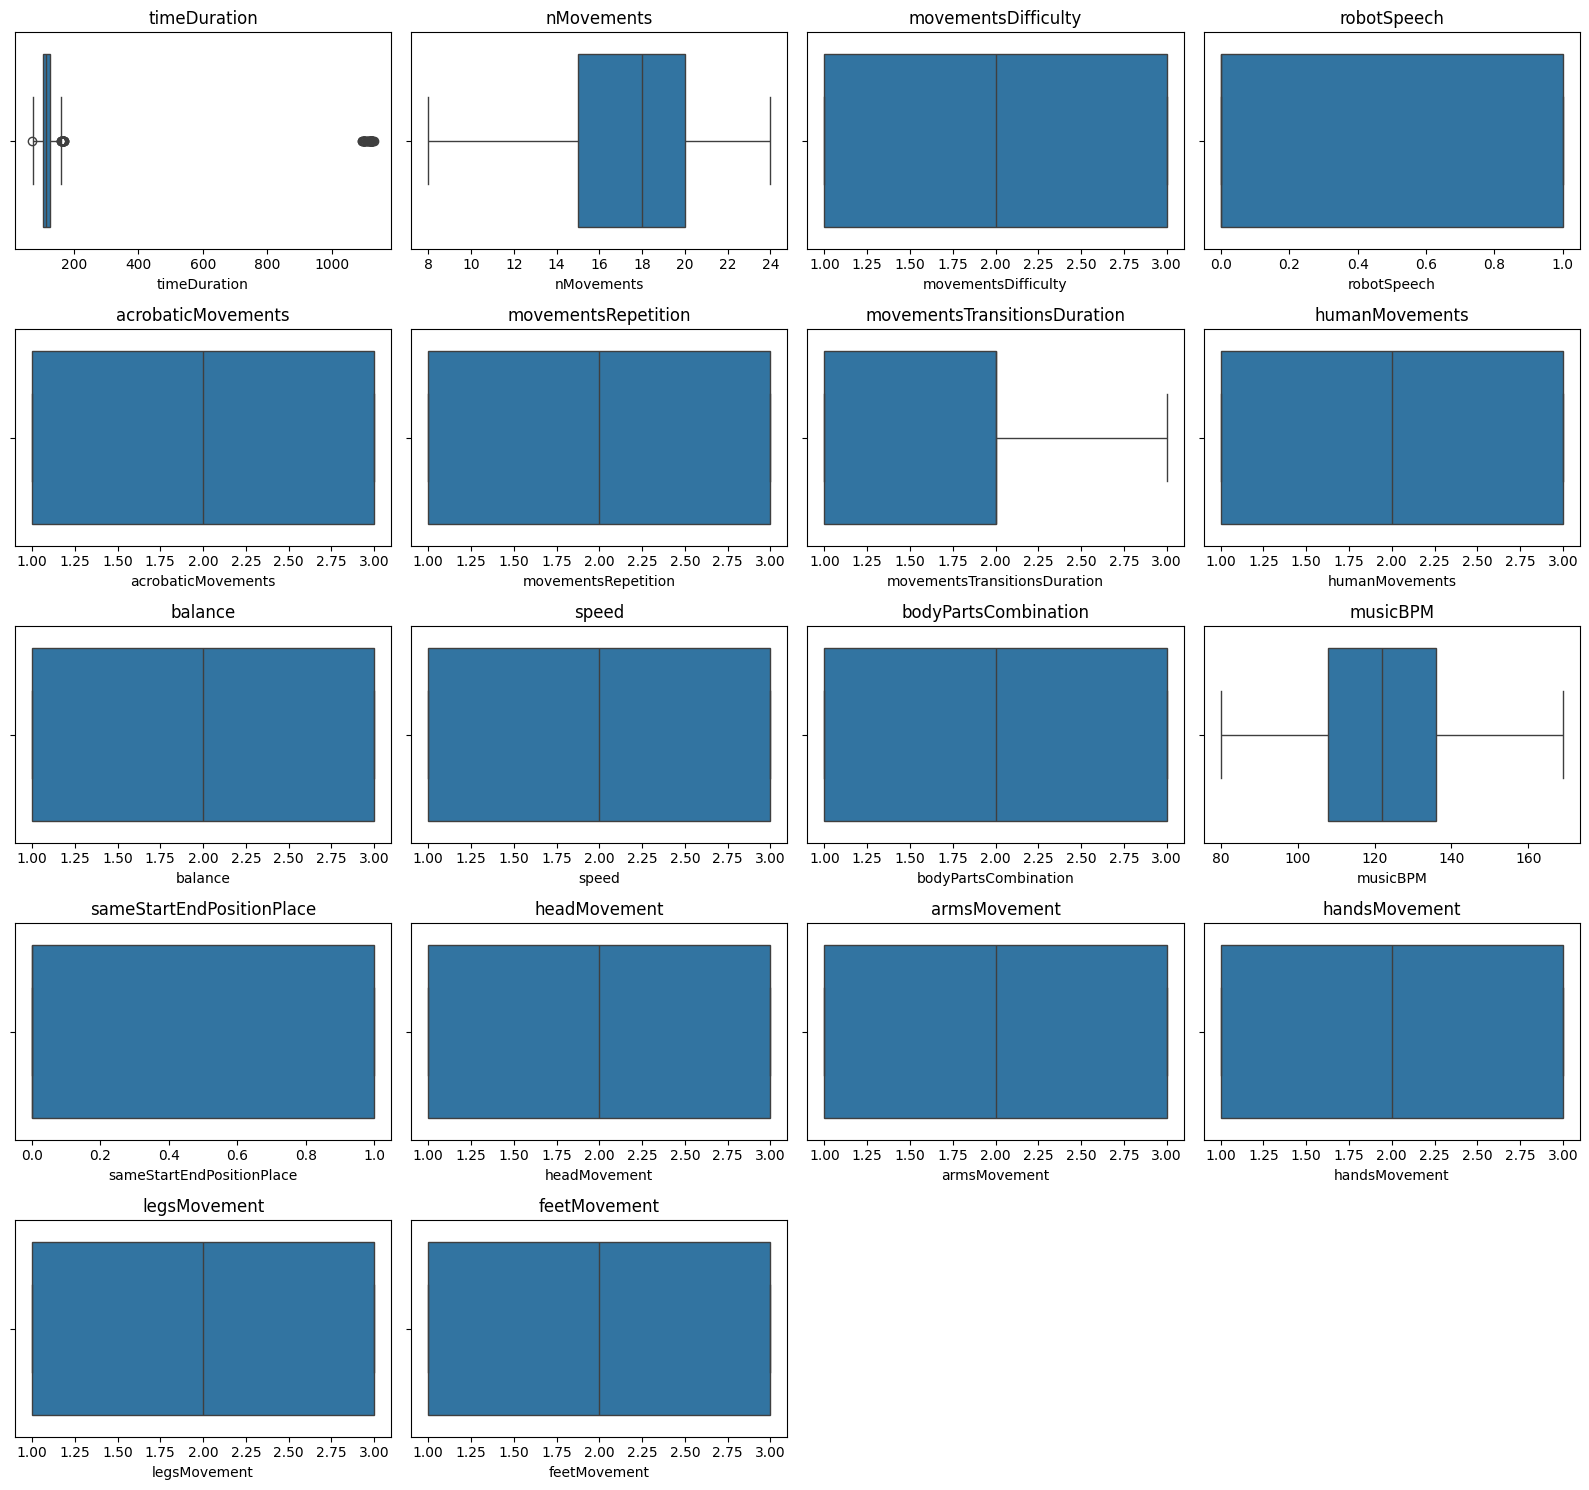

In [ ]:
# Univariate BOXPLOTS
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[total_plots-1:]:
    fig.delaxes(ax)

fig.tight_layout()

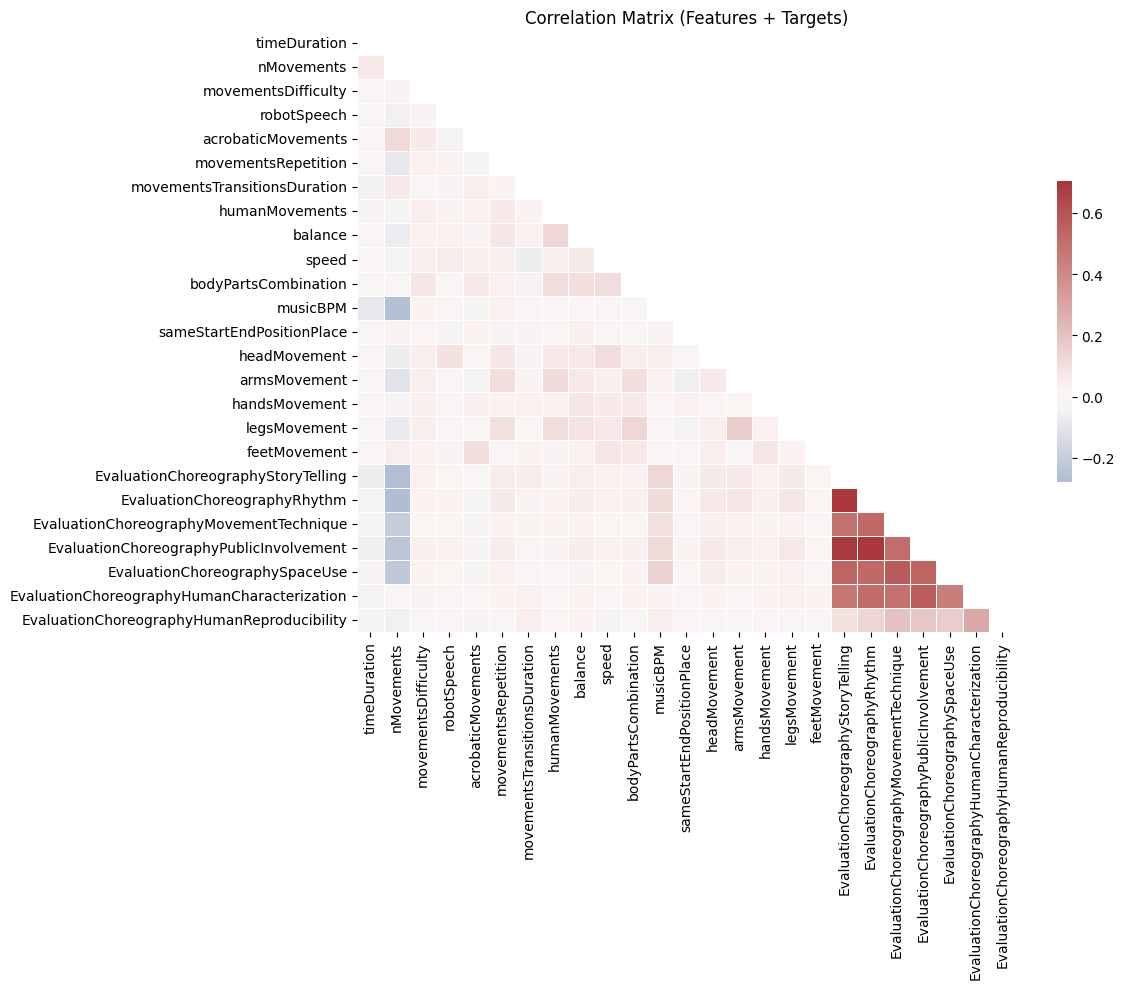

In [ ]:
# Correlation Matrix
corr = df[numeric_cols + target_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, mask=mask, cmap='vlag', center=0,
    linewidths=0.5, cbar_kws={'shrink':0.5}
)
plt.title("Correlation Matrix (Features + Targets)")
plt.tight_layout()

### Preprocessing

In [6]:
feature_cols = [
    'timeDuration','nMovements','movementsDifficulty','robotSpeech',
    'acrobaticMovements','movementsRepetition', 'movementsTransitionsDuration','humanMovements','balance',
    'speed','bodyPartsCombination','musicBPM','sameStartEndPositionPlace',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]
feature_cols += genre_cols

Saving the file `feature_cols.txt`.
you can only run it once and skip this cell for the next runs.

In [7]:
with open("feature_cols.txt", "w") as f:
    for feat in feature_cols:
        f.write(feat + "\n")

In [8]:
# Create a dict of per-target DataFrames
datasets = {}
for tgt in target_cols:
    datasets[tgt] = df[feature_cols + [tgt]].copy()

for tgt, d in datasets.items():
    print(f"{tgt}: {d.shape[0]} rows, {d.shape[1]} cols")

EvaluationChoreographyStoryTelling: 8563 rows, 26 cols
EvaluationChoreographyRhythm: 8563 rows, 26 cols
EvaluationChoreographyMovementTechnique: 8563 rows, 26 cols
EvaluationChoreographyPublicInvolvement: 8563 rows, 26 cols
EvaluationChoreographySpaceUse: 8563 rows, 26 cols
EvaluationChoreographyHumanCharacterization: 8563 rows, 26 cols
EvaluationChoreographyHumanReproducibility: 8563 rows, 26 cols


### Target-Specific EDA

In [ ]:
# Create binary class columns on the fly
for tgt in target_cols:
    df[f"{tgt} Class"] = (df[tgt] >= 4).astype(int)

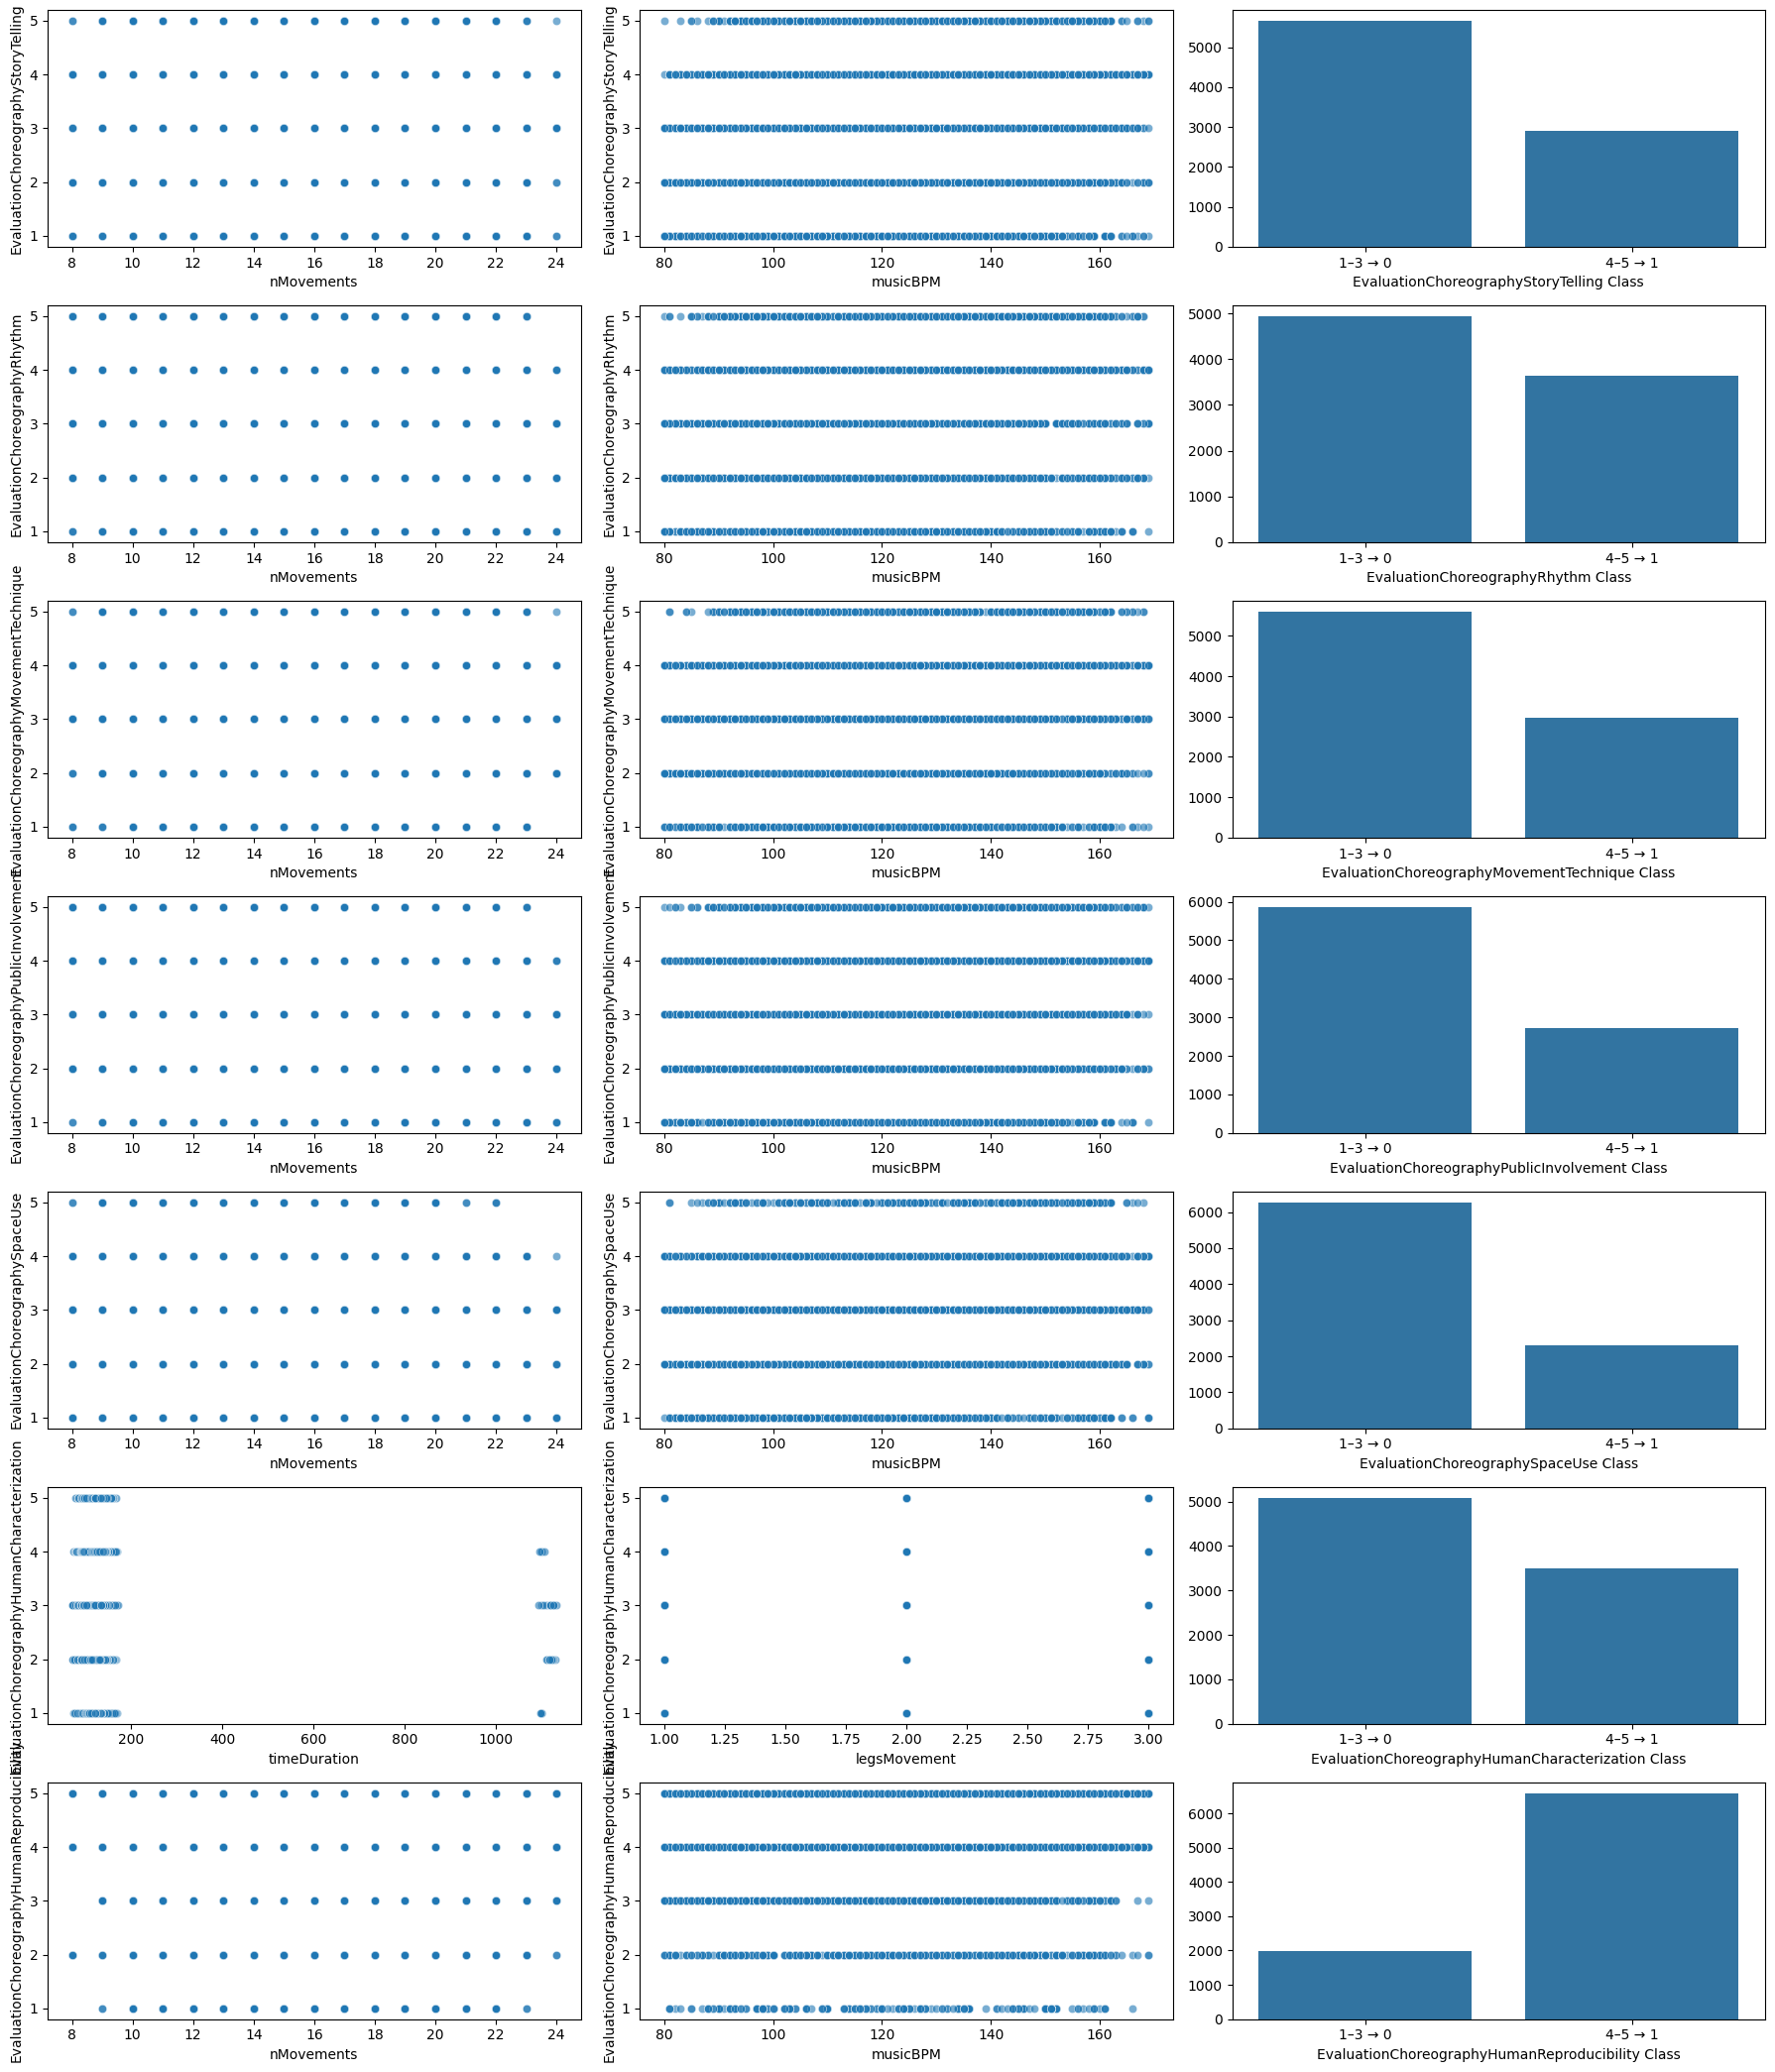

In [ ]:
n = len(target_cols)
fig, axes = plt.subplots(n, 3, figsize=(18, n*3), squeeze=False)

for i, tgt in enumerate(target_cols):
    # pick top‐2 correlated numeric features
    top_feats = (corr[tgt]
                 .drop(tgt)
                 .loc[numeric_cols]
                 .abs()
                 .sort_values(ascending=False)
                 .index[:2]
                 .tolist())

    # plot scatter Feature 1 vs Target
    ax = axes[i, 0]
    sns.scatterplot(x=df[top_feats[0]], y=df[tgt], ax=ax, alpha=0.6)

    # plot scatter Feature 2 vs Target
    ax = axes[i, 1]
    sns.scatterplot(x=df[top_feats[1]], y=df[tgt], ax=ax, alpha=0.6)

    # plot class‐balance bar
    ax = axes[i, 2]
    class_col = f"{tgt} Class"
    counts = df[class_col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['1–3 → 0', '4–5 → 1'])

plt.tight_layout()
plt.show()

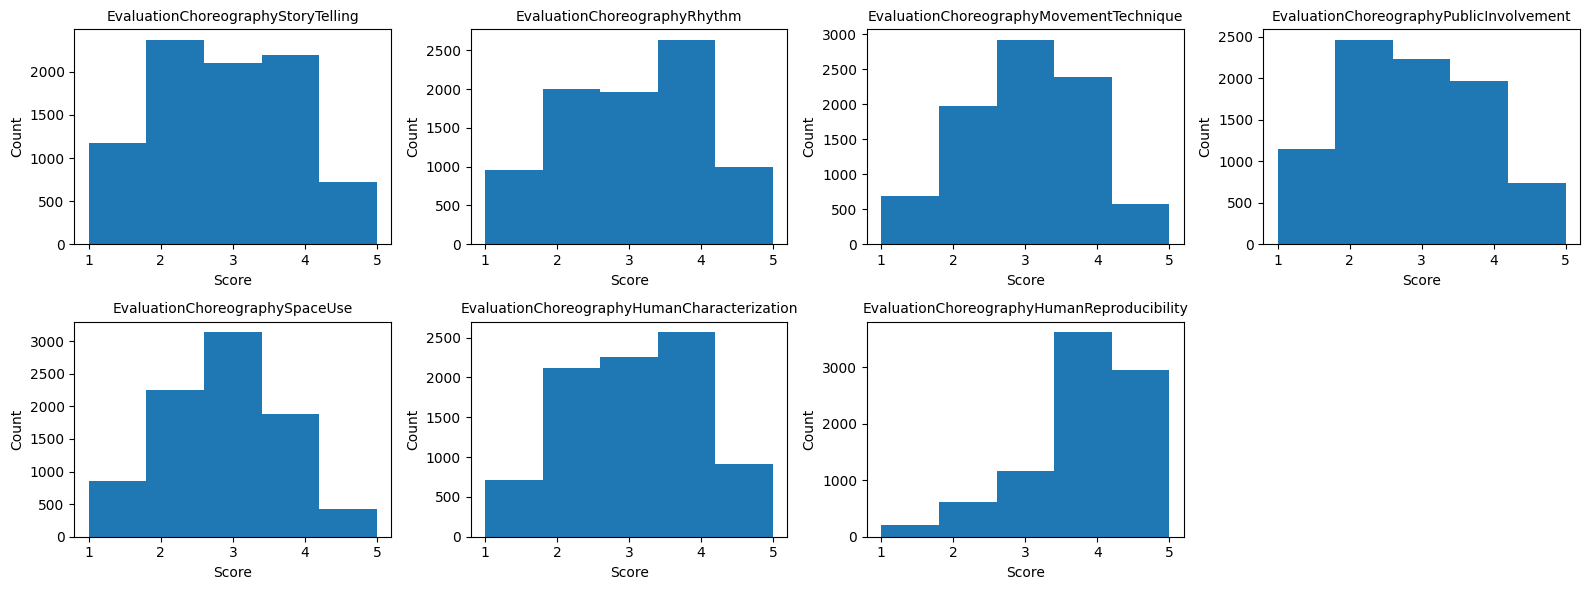

In [ ]:
# Target distributions
n = len(target_cols)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for ax, col in zip(axes, target_cols):
    ax.hist(df[col], bins=5)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

for ax in axes[n:]:
    fig.delaxes(ax)

fig.tight_layout()
plt.show()

In [ ]:
skew_df = pd.DataFrame({
    'skewness': df[numeric_cols].skew(),
    'kurtosis': df[numeric_cols].kurtosis()
}).sort_values('skewness', key=abs, ascending=False)
# display(skew_df)

high_skew = skew_df[skew_df['skewness'].abs() > 1].index.tolist()
print("Highly skewed features:", high_skew)

Highly skewed features: ['timeDuration']


### Train/Val/Test Sets

#### Creating Sets

**You only need to run the section `Creating Sets` once.**

**For the next times, you can skip it and start from the next section `Loading Sets`.**

Sample a small `BACKGROUND` set from `X_train` for SHAP (e.g., 200 rows).

In [19]:
output_dir = '/content/drive/MyDrive/AI_in_Industry/choreography_splits'
os.makedirs(output_dir, exist_ok=True)

In [20]:
for tgt in target_cols:
    X = df[feature_cols].copy()
    y = df[tgt].copy()

    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=1/9, random_state=42
    )

    n_background = min(200, X_train.shape[0])
    X_background = X_train.sample(n=n_background, random_state=42)

    tgt_slug = (
        tgt
        .replace('EvaluationChoreography', '')
        .lower()
    )

    fn_X_train = os.path.join(output_dir, f'X_train_{tgt_slug}.csv')
    fn_X_val = os.path.join(output_dir, f'X_val_{tgt_slug}.csv')
    fn_X_test = os.path.join(output_dir, f'X_test_{tgt_slug}.csv')
    fn_y_train = os.path.join(output_dir, f'y_train_{tgt_slug}.csv')
    fn_y_val = os.path.join(output_dir, f'y_val_{tgt_slug}.csv')
    fn_y_test = os.path.join(output_dir, f'y_test_{tgt_slug}.csv')
    fn_X_background = os.path.join(output_dir, f'X_background_{tgt_slug}.csv')

    X_train.to_csv(fn_X_train, index=False)
    X_val.to_csv(fn_X_val, index=False)
    X_test.to_csv(fn_X_test, index=False)
    y_train.to_csv(fn_y_train, index=False)
    y_val.to_csv(fn_y_val, index=False)
    y_test.to_csv(fn_y_test, index=False)
    X_background.to_csv(fn_X_background, index=False)

    print(f"Saved CSVs for target '{tgt}' as slug '{tgt_slug}':")
    print(f"  - {fn_X_train}")
    print(f"  - {fn_X_val}")
    print(f"  - {fn_X_test}")
    print(f"  - {fn_y_train}")
    print(f"  - {fn_y_val}")
    print(f"  - {fn_y_test}")
    print(f"  - {fn_X_background}\n")

Saved CSVs for target 'EvaluationChoreographyStoryTelling' as slug 'storytelling':
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_train_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_val_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_test_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/y_train_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/y_val_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/y_test_storytelling.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_background_storytelling.csv

Saved CSVs for target 'EvaluationChoreographyRhythm' as slug 'rhythm':
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_train_rhythm.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_val_rhythm.csv
  - /content/drive/MyDrive/AI_in_Industry/choreography_splits/X_test_rhythm.c

Creating and downloading related CSVs for the `choreo_splits` as a zip file.

In [21]:
shutil.make_archive('/content/drive/MyDrive/AI_in_Industry/choreo_splits', 'zip', '/content/drive/MyDrive/AI_in_Industry/choreography_splits')
files.download('/content/drive/MyDrive/AI_in_Industry/choreo_splits.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Loading Sets

In [22]:
load_dir = '/content/drive/MyDrive/AI_in_Industry/choreography_splits'

In [23]:
target_slugs = {
    'storytelling': 'EvaluationChoreographyStoryTelling',
    'rhythm':      'EvaluationChoreographyRhythm',
    'movementtechnique': 'EvaluationChoreographyMovementTechnique',
    'publicinvolvement': 'EvaluationChoreographyPublicInvolvement',
    'spaceuse':       'EvaluationChoreographySpaceUse',
    'humancharacterization': 'EvaluationChoreographyHumanCharacterization',
    'humanreproducibility':  'EvaluationChoreographyHumanReproducibility'
}

splits = {}

for slug, full_target_name in target_slugs.items():
    fn_X_train  = os.path.join(load_dir, f'X_train_{slug}.csv')
    fn_X_val    = os.path.join(load_dir, f'X_val_{slug}.csv')
    fn_X_test   = os.path.join(load_dir, f'X_test_{slug}.csv')
    fn_y_train  = os.path.join(load_dir, f'y_train_{slug}.csv')
    fn_y_val    = os.path.join(load_dir, f'y_val_{slug}.csv')
    fn_y_test   = os.path.join(load_dir, f'y_test_{slug}.csv')
    # fn_X_bg     = os.path.join(load_dir, f'X_background_{slug}.csv')  # optional

    X_train = pd.read_csv(fn_X_train)
    X_val   = pd.read_csv(fn_X_val)
    X_test  = pd.read_csv(fn_X_test)

    y_train = pd.read_csv(fn_y_train).iloc[:, 0]
    y_val   = pd.read_csv(fn_y_val).iloc[:, 0]
    y_test  = pd.read_csv(fn_y_test).iloc[:, 0]

    # (Optional) background set
    # X_background = pd.read_csv(fn_X_bg)

    splits[full_target_name] = {
        'X_train': X_train,
        'X_val':   X_val,
        'X_test':  X_test,
        'y_train': y_train,
        'y_val':   y_val,
        'y_test':  y_test,
        # 'X_background': X_background  # if you need it later
    }

for tgt_name, d in splits.items():
    print(
        f"{tgt_name:45s} → "
        f"train: {d['X_train'].shape[0]:4d}  | "
        f"val: {d['X_val'].shape[0]:4d}  | "
        f"test: {d['X_test'].shape[0]:4d}"
    )

EvaluationChoreographyStoryTelling            → train: 6849  | val:  857  | test:  857
EvaluationChoreographyRhythm                  → train: 6849  | val:  857  | test:  857
EvaluationChoreographyMovementTechnique       → train: 6849  | val:  857  | test:  857
EvaluationChoreographyPublicInvolvement       → train: 6849  | val:  857  | test:  857
EvaluationChoreographySpaceUse                → train: 6849  | val:  857  | test:  857
EvaluationChoreographyHumanCharacterization   → train: 6849  | val:  857  | test:  857
EvaluationChoreographyHumanReproducibility    → train: 6849  | val:  857  | test:  857
